## Ejercicio 1

In [1]:
import cirq
from cirq import Circuit, Simulator, LineQubit
import matplotlib.pyplot as plt

In [2]:
qubit = LineQubit(0)

circuit = Circuit()
circuit.append(cirq.H(qubit))
circuit.append(cirq.measure(qubit))

print(circuit)

0: ───H───M───


In [3]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=100)
print("Resultados: ", result)

Resultados:  0=1111010000011010011001110101010100110101000010001101001010000001011110110111100001100111000011010001


<AxesSubplot:title={'center':'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

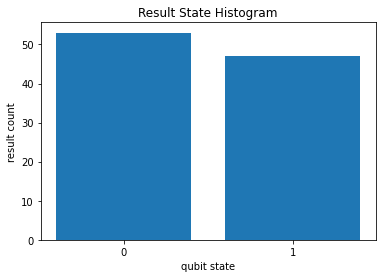

In [4]:
cirq.vis.plot_state_histogram(result, plt.subplot())

En el histograma podemos ver como se reparte aleatoriamente la cantidad de datos en cada estado.

## Ejercicio 2

In [5]:
import cirq
from cirq import Circuit, Simulator, LineQubit
import math

#### QFT

In [6]:
q0, q1, q2, q3 = cirq.LineQubit.range(4)

circuit = Circuit()
circuit.append(cirq.X(q0))
circuit.append(cirq.X(q2))

circuit.append(cirq.H(q3))
circuit.append(cirq.cphase(1/8)(q0, q3))
circuit.append(cirq.cphase(1/4)(q1, q3))
circuit.append(cirq.cphase(1/2)(q2, q3))

circuit.append(cirq.H(q2))
circuit.append(cirq.cphase(1/4)(q0, q2))
circuit.append(cirq.cphase(1/2)(q1, q2))

circuit.append(cirq.H(q1))
circuit.append(cirq.cphase(1/2)(q0, q1))

circuit.append(cirq.H(q0))
circuit.append(cirq.SWAP(q1, q2))
circuit.append(cirq.SWAP(q0, q3))

print(circuit)

0: ───X───@───────────────────────────────@──────────────────────@─────────H───×───
          │                               │                      │             │
1: ───────┼────────@──────────────────────┼────────@─────────H───@^0.159───×───┼───
          │        │                      │        │                       │   │
2: ───X───┼────────┼────────@─────────H───@^0.08───@^0.159─────────────────×───┼───
          │        │        │                                                  │
3: ───H───@^0.04───@^0.08───@^0.159────────────────────────────────────────────×───


In [7]:
# QFT inverso para comprobar que funciona
circuit.append(cirq.SWAP(q0, q3))
circuit.append(cirq.SWAP(q1, q2))
circuit.append(cirq.H(q0))

circuit.append(cirq.cphase(-1/2)(q0, q1))
circuit.append(cirq.H(q1))

circuit.append(cirq.cphase(-1/2)(q1, q2))
circuit.append(cirq.cphase(-1/4)(q0, q2))
circuit.append(cirq.H(q2))

circuit.append(cirq.cphase(-1/2)(q2, q3))
circuit.append(cirq.cphase(-1/4)(q1, q3))
circuit.append(cirq.cphase(-1/8)(q0, q3))
circuit.append(cirq.H(q3))

circuit.append(cirq.measure(q0, q1, q2, q3))

print(circuit)

                                                                               ┌──┐
0: ───X───@───────────────────────────────@──────────────────────@─────────H────×─────×───H───@─────────────────────────@──────────────────────────────────@─────────────M───
          │                               │                      │              │     │       │                         │                                  │             │
1: ───────┼────────@──────────────────────┼────────@─────────H───@^0.159───×────┼×────┼───────@^-0.159───H───@──────────┼────────────────────────@─────────┼─────────────M───
          │        │                      │        │                       │    ││    │                      │          │                        │         │             │
2: ───X───┼────────┼────────@─────────H───@^0.08───@^0.159─────────────────×────┼×────┼──────────────────────@^-0.159───@^-0.08───H───@──────────┼─────────┼─────────────M───
          │        │        │                       

In [8]:
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print("Resultados: ", result)

Resultados:  measurements: 0,1,2,3=1010
output vector: |1010⟩


Para demostrar que funciona, se puede probar con una secuencia de bits (q0 y q2 en este caso). Si la entrada de la QFT y la salida de la QFT inversa son iguales, entonces la QFT funciona. En este caso podemos decir que el circuito está funcionando.

#### AQFT

In [9]:
q0, q1, q2, q3 = cirq.LineQubit.range(4)

circuit = Circuit()

circuit.append(cirq.X(q0))
circuit.append(cirq.X(q3))

circuit.append(cirq.H(q0))
circuit.append(cirq.cphase(1/2)(q0, q1))
circuit.append(cirq.cphase(1/4)(q0, q2))

circuit.append(cirq.H(q1))
circuit.append(cirq.cphase(1/2)(q1, q2))
circuit.append(cirq.cphase(1/4)(q1, q3))

circuit.append(cirq.H(q2))
circuit.append(cirq.cphase(1/2)(q2, q3))

circuit.append(cirq.H(q3))

print(circuit)


                        ┌───────┐             ┌───────┐
0: ───X───H───@──────────@──────────────────────────────────────────────
              │          │
1: ───────────@^0.159────┼─────H────@──────────@────────────────────────
                         │          │          │
2: ──────────────────────@^0.08─────@^0.159────┼─────H────@─────────────
                                               │          │
3: ───X────────────────────────────────────────@^0.08─────@^0.159───H───
                        └───────┘             └───────┘


In [10]:
# AQFT inverso para comprobar que funciona
circuit.append(cirq.H(q3))

circuit.append(cirq.cphase(-1/2)(q2, q3))
circuit.append(cirq.H(q2))

circuit.append(cirq.cphase(-1/4)(q1, q3))
circuit.append(cirq.cphase(-1/2)(q1, q2))
circuit.append(cirq.H(q1))

circuit.append(cirq.cphase(-1/4)(q0, q2))
circuit.append(cirq.cphase(-1/2)(q0, q1))
circuit.append(cirq.H(q0))

circuit.append(cirq.measure(q0, q1, q2, q3))

print(circuit)

                        ┌───────┐             ┌───────┐                                ┌────────┐              ┌────────┐
0: ───X───H───@──────────@───────────────────────────────────────────────────────────────────────────────────────@──────────@──────────H───M───
              │          │                                                                                       │          │              │
1: ───────────@^0.159────┼─────H────@──────────@─────────────────────────────────────────@──────────@───────────H┼──────────@^-0.159───────M───
                         │          │          │                                         │          │            │                         │
2: ──────────────────────@^0.08─────@^0.159────┼─────H────@─────────────────@───────────H┼──────────@^-0.159─────@^-0.08───────────────────M───
                                               │          │                 │            │                                                 │
3: ───X────────────────

In [11]:
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print("Resultados: ", result)

Resultados:  measurements: 0,1,2,3=1001
output vector: |1001⟩


Al igual que con la QFT, si la entrada y la salida de la AQFT son iguales, entonces la AQFT funciona.

## Ejercicio 3

#### QFT

In [20]:
q0, q1, q2, q3, q4, q5, q6, q7 = cirq.LineQubit.range(8)

# QFT
circuit = Circuit()
circuit.append(cirq.X(q0))
circuit.append(cirq.X(q7))

circuit.append(cirq.H(q0))
circuit.append(cirq.cphase(1/2)(q0, q1))
circuit.append(cirq.cphase(1/4)(q0, q2))
circuit.append(cirq.cphase(1/8)(q0, q3))

circuit.append(cirq.H(q1))
circuit.append(cirq.cphase(1/2)(q1, q2))
circuit.append(cirq.cphase(1/4)(q1, q3))

circuit.append(cirq.H(q2))
circuit.append(cirq.cphase(1/2)(q2, q3))

circuit.append(cirq.H(q3))

In [21]:
# ADDER
circuit.append(cirq.CZ(q0, q4))
circuit.append(cirq.CZ(q0, q5)**0.5)
circuit.append(cirq.CZ(q0, q6)**0.25)
circuit.append(cirq.CZ(q0, q7)**0.125)

circuit.append(cirq.CZ(q1, q5))
circuit.append(cirq.CZ(q1, q6)**0.5)
circuit.append(cirq.CZ(q1, q7)**0.25)

circuit.append(cirq.CZ(q2, q6))
circuit.append(cirq.CZ(q2, q7)**0.5)

circuit.append(cirq.CZ(q3, q7))

In [22]:
# QFT inverso
circuit.append(cirq.H(q3))

circuit.append(cirq.cphase(-1/2)(q2, q3))
circuit.append(cirq.H(q2))

circuit.append(cirq.cphase(-1/4)(q1, q3))
circuit.append(cirq.cphase(-1/2)(q1, q2))
circuit.append(cirq.H(q1))

circuit.append(cirq.cphase(-1/8)(q0, q3))
circuit.append(cirq.cphase(-1/4)(q0, q2))
circuit.append(cirq.cphase(-1/2)(q0, q1))
circuit.append(cirq.H(q0))

circuit.append(cirq.measure(q0, q1, q2, q3))

print(circuit)

                        ┌───────┐   ┌─────────────┐   ┌────────┐   ┌────────────┐   ┌────────┐   ┌────────────┐   ┌───────┐                              ┌────────┐   ┌───────────────┐   ┌────────┐
0: ───X───H───@──────────@───────────@────────────────────────@────────────@──────────@───────────@────────────────────────────────────────────────────────────────────────────@────────────@──────────@──────────H───M───
              │          │           │                        │            │          │           │                                                                            │            │          │              │
1: ───────────@^0.159────┼─────H─────┼─────@───────────@──────┼────────────┼──────────┼─────@─────┼──────@─────────@───────────────────────────────────────@───────────@───────┼───────────H┼──────────@^-0.159───────M───
                         │           │     │           │      │            │          │     │     │      │         │                                 

In [23]:
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print("Resultados: ", result)

Resultados:  measurements: 0,1,2,3=1001
output vector: (-0.028-1j)|10010001⟩


Como podemos observar en el vector de salida el sumador de Draper con QFT funciona porque en el operando de entrada A se ha sumado el valor del operando B mientras que B se mantiene intacto.

#### AQFT

In [28]:
# AQFT
q0, q1, q2, q3, q4, q5, q6, q7 = cirq.LineQubit.range(8)

circuit = Circuit()

circuit.append(cirq.X(q0))
circuit.append(cirq.X(q1))
circuit.append(cirq.X(q7))

circuit.append(cirq.H(q0))
circuit.append(cirq.cphase(1/2)(q0, q1))
circuit.append(cirq.cphase(1/4)(q0, q2))

circuit.append(cirq.H(q1))
circuit.append(cirq.cphase(1/2)(q1, q2))
circuit.append(cirq.cphase(1/4)(q1, q3))

circuit.append(cirq.H(q2))
circuit.append(cirq.cphase(1/2)(q2, q3))

circuit.append(cirq.H(q3))

In [29]:
# ADDER
circuit.append(cirq.CZ(q0, q4))
circuit.append(cirq.CZ(q0, q5)**0.5)
circuit.append(cirq.CZ(q0, q6)**0.25)
circuit.append(cirq.CZ(q0, q7)**0.125)

circuit.append(cirq.CZ(q1, q5))
circuit.append(cirq.CZ(q1, q6)**0.5)
circuit.append(cirq.CZ(q1, q7)**0.25)

circuit.append(cirq.CZ(q2, q6))
circuit.append(cirq.CZ(q2, q7)**0.5)

circuit.append(cirq.CZ(q3, q7))

In [30]:
# AQFT inverso para comprobar que funciona
circuit.append(cirq.H(q3))

circuit.append(cirq.cphase(-1/2)(q2, q3))
circuit.append(cirq.H(q2))

circuit.append(cirq.cphase(-1/4)(q1, q3))
circuit.append(cirq.cphase(-1/2)(q1, q2))
circuit.append(cirq.H(q1))

circuit.append(cirq.cphase(-1/4)(q0, q2))
circuit.append(cirq.cphase(-1/2)(q0, q1))
circuit.append(cirq.H(q0))

circuit.append(cirq.measure(q0, q1, q2, q3))

print(circuit)

                        ┌───────┐   ┌────────┐   ┌────────────┐   ┌──────────────┐   ┌─────────────┐   ┌───────┐                              ┌────────┐              ┌────────┐
0: ───X───H───@──────────@──────────────────@────────────@────────────────@────────────@────────────────────────────────────────────────────────────────────────────────@──────────@──────────H───M───
              │          │                  │            │                │            │                                                                                │          │              │
1: ───X───────@^0.159────┼─────H─────@──────┼─────@──────┼────────────────┼─────@──────┼──────@─────────@───────────────────────────────────────@──────────@───────────H┼──────────@^-0.159───────M───
                         │           │      │     │      │                │     │      │      │         │                                       │          │            │                         │
2: ──────────────────────@^0.08──

In [31]:
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print("Resultados: ", result)

Resultados:  measurements: 0,1,2,3=1101
output vector: (0.281-0.96j)|11010001⟩


Al igual que con QFT como podemos observar en el vector de salida el sumador de Draper con AQFT funciona porque en el operando de entrada A se ha sumado el valor del operando B mientras que B se mantiene intacto.

## Ejercicio 4

### IBM

In [29]:
# Cargamos las credenciales de IBMQ
from qiskit import IBMQ

with open('qiskit.txt', 'r') as file:
	token = file.read()

# IBMQ.save_account(token, hub='ibm-q-education', group='uni-complutense-2', project='architecture-pro', overwrite=True)
IBMQ.save_account(token, overwrite=True)

In [89]:
from qiskit import QuantumCircuit, Aer
from qiskit import execute
from qiskit.visualization import plot_histogram
from math import pi

#### QFT

In [86]:
# QFT
circuit = QuantumCircuit(8, 8)

circuit.x(0)
circuit.x(7)

circuit.h(0)
circuit.crz(1/2, 0, 1)
circuit.crz(1/4, 0, 2)
circuit.crz(1/8, 0, 3)

circuit.h(1)
circuit.crz(1/2, 1, 2)
circuit.crz(1/4, 1, 3)

circuit.h(2)
circuit.crz(1/2, 2, 3)

circuit.h(3)

# Adder
circuit.cz(0, 4),
circuit.crz(1/2, 0, 5)
circuit.crz(1/4, 0, 6)
circuit.crz(1/8, 0, 7)

circuit.cz(1, 5)
circuit.crz(0.5, 1, 6)
circuit.crz(1/4, 1, 7)

circuit.cz(2, 6)
circuit.crz(1/2, 2, 7)

circuit.cz(3, 7)

# QFT invertida
circuit.h(3)

circuit.crz(-1/2, 2, 3)
circuit.h(2)

circuit.crz(-1/4, 1, 3)
circuit.crz(-1/2, 1, 2)
circuit.h(1)

circuit.crz(-1/8, 0, 3)
circuit.crz(-1/4, 0, 2)
circuit.crz(-1/2, 0, 1)
circuit.h(0)

In [87]:
circuit.measure([0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7])
circuit.draw()

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
counts = job.result().get_counts(circuit)

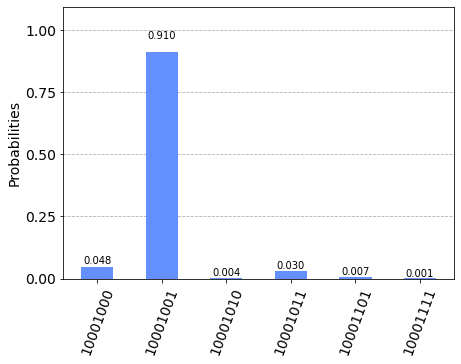

In [88]:
plot_histogram(counts)

Al igual que con Cirq podemos ver en el histograma que la salida de la QFT es la suma de los operadores A y B en A.

La simulación no se ha podido hacer en un backend real porque no tenemos disponibles maquinas con tantos qubits como el circuito.

#### AQFT

In [124]:
# AQFT
circuit = QuantumCircuit(8, 8)

circuit.x(0)
circuit.x(5)
circuit.x(6)
circuit.x(7)

circuit.h(0)
circuit.crz(1/2, 0, 1)
circuit.crz(1/4, 0, 2)

circuit.h(1)
circuit.crz(1/2, 1, 2)
circuit.crz(1/4, 1, 3)

circuit.h(2)
circuit.crz(1/2, 2, 3)

circuit.h(3)

# Adder
circuit.cz(0, 4),
circuit.crz(1/2, 0, 5)
circuit.crz(1/4, 0, 6)
circuit.crz(1/8, 0, 7)

circuit.cz(1, 5)
circuit.crz(0.5, 1, 6)
circuit.crz(1/4, 1, 7)

circuit.cz(2, 6)
circuit.crz(1/2, 2, 7)

circuit.cz(3, 7)

# AQFT invertida
circuit.h(3)

circuit.crz(-1/2, 2, 3)
circuit.h(2)

circuit.crz(-1/4, 1, 3)
circuit.crz(-1/2, 1, 2)
circuit.h(1)

circuit.crz(-1/4, 0, 2)
circuit.crz(-1/2, 0, 1)
circuit.h(0)

In [125]:
circuit.measure([0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7])
circuit.draw()

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
counts = job.result().get_counts(circuit)

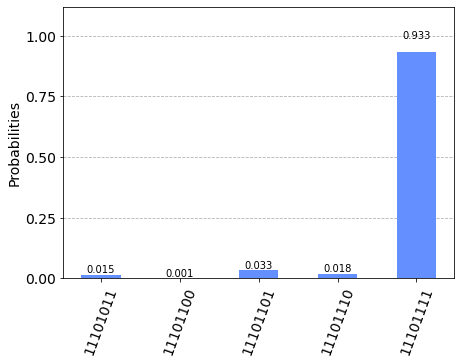

In [126]:
plot_histogram(counts)

Al igual que con Cirq podemos ver en el histograma que la salida de la AQFT es la suma de los operadores A y B en A.

La simulación no se ha podido hacer en un backend real porque no tenemos disponibles maquinas con tantos qubits como el circuito.

### IonQ

In [10]:
from braket.circuits import Circuit
from braket.aws import AwsDevice
import matplotlib.pyplot as plt

#### QFT

In [11]:
def controlled_z(t,c):
    circ = Circuit()
    circ.h(t).cnot(c,t).h(t)
    return circ

def controlled_rotation(t,c,theta):
    circ = Circuit().rz(t,theta/2).cnot(c,t).rz(t,-theta/2).cnot(c,t)
    return circ

circuit = (Circuit() 
	.x(0)
	.x(1)
	.x(2)
	.x(7)

	.h(0)
	.add_circuit(controlled_rotation(0, 1, 0.5))
	.add_circuit(controlled_rotation(0, 2, 0.25))
	.add_circuit(controlled_rotation(0, 3, 1/8))
	.h(1)
	.add_circuit(controlled_rotation(1, 2, 0.5))
	.add_circuit(controlled_rotation(1, 3, 0.25))
	.h(2)
	.add_circuit(controlled_rotation(2, 3, 0.5))
	.h(3)

	.add_circuit(controlled_z(0, 4))
	.add_circuit(controlled_rotation(0, 5, 1/2))
	.add_circuit(controlled_rotation(0, 6, 1/4))
	.add_circuit(controlled_rotation(0, 7, 1/8))
	.add_circuit(controlled_z(1, 5))
	.add_circuit(controlled_rotation(1, 6, 1/2))
	.add_circuit(controlled_rotation(1, 7, 1/4))
	.add_circuit(controlled_z(2, 6))
	.add_circuit(controlled_rotation(2, 7, 1/2))
	.add_circuit(controlled_z(3, 7))

	.h(3)
	.add_circuit(controlled_rotation(2, 3, -1/2))
	.h(2)
	.add_circuit(controlled_rotation(1, 3, -1/4))
	.add_circuit(controlled_rotation(1, 2, -1/2))
	.h(1)
	.add_circuit(controlled_rotation(0, 3, -1/8))
	.add_circuit(controlled_rotation(0, 2, -1/4))
	.add_circuit(controlled_rotation(0, 1, -1/2))
	.h(0)
)

In [13]:
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/IONQ")

print(circuit)

print("Resultados: ", device.run(circuit, s3_folder).result().measurement_counts)

T  : |0|1|   2    |3|    4    |5|    6    |    7     |    8     |9|    10    |    11     |    12     |    13     |    14    |     15     |16|   17   |    18     |   19    |20 |    21     |22 |    23    |24|    25    |    26     |    27     |    28     |     29      |    30    |31|    32    |   33    |34|   35    |36|37|38|   39   |40|41 |   42    |43|    44     |    45    |    46    |    47    |48 |   49    |50|   51    |52|   53   |54|55|
                                                                                                                                                                                                                                                                                                                                                                                                                                                           
q0 : -X-H-Rz(0.25)-X-Rz(-0.25)-X-Rz(0.125)-X----------Rz(-0.125)-X-Rz(0.0625)-X-----------Rz(-0.0625)-X---------

In [ ]:
plt.bar(result.measurement_counts.keys(), result.measurement_counts.values())

#### AQFT

In [14]:
def controlled_z(t,c):
  circ = Circuit()
  circ.h(t).cnot(c,t).h(t)
  return circ

def controlled_rotation(t,c,theta):
  circ = Circuit().rz(t,theta/2).cnot(c,t).rz(t,-theta/2).cnot(c,t)
  return circ

draper = (Circuit()
  .x(0)
  .x(1)
  .x(2)
  .x(7)

  .h(0)
  .add_circuit(controlled_rotation(0,1,1/2))
  .add_circuit(controlled_rotation(0,2,1/4))
  .h(1)
  .add_circuit(controlled_rotation(1,2,1/2))
  .add_circuit(controlled_rotation(1,3,1/4))
  .h(2)
  .add_circuit(controlled_rotation(2,3,1/2))
  .h(3)

  .add_circuit(controlled_z(0,4))
  .add_circuit(controlled_rotation(0,5,1/2))
  .add_circuit(controlled_rotation(0,6,1/4))
  .add_circuit(controlled_rotation(0,7,1/8))
  .add_circuit(controlled_z(1,5))
  .add_circuit(controlled_rotation(1,6,1/2))
  .add_circuit(controlled_rotation(1,7,1/4))
  .add_circuit(controlled_z(2,6))
  .add_circuit(controlled_rotation(2,7,1/2))
  .add_circuit(controlled_z(3,7))

  .h(3)
  .add_circuit(controlled_rotation(2,3,-1/2))
  .h(2)
  .add_circuit(controlled_rotation(1,3,-1/4))
  .add_circuit(controlled_rotation(1,2,-1/2))
  .h(1)
  .add_circuit(controlled_rotation(0,2,-1/4))
  .add_circuit(controlled_rotation(0,1,-1/2))
  .h(0)
)

In [15]:
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/IONQ")

print(circuit)

print("Resultados: ", device.run(circuit, s3_folder).result().measurement_counts)

T  : |0|1|   2    |3|    4    |5|    6    |    7     |    8     |9|    10    |    11     |    12     |    13     |    14    |     15     |16|   17   |    18     |   19    |20 |    21     |22 |    23    |24|    25    |    26     |    27     |    28     |     29      |    30    |31|    32    |   33    |34|   35    |36|37|38|   39   |40|41 |   42    |43|    44     |    45    |    46    |    47    |48 |   49    |50|   51    |52|   53   |54|55|
                                                                                                                                                                                                                                                                                                                                                                                                                                                           
q0 : -X-H-Rz(0.25)-X-Rz(-0.25)-X-Rz(0.125)-X----------Rz(-0.125)-X-Rz(0.0625)-X-----------Rz(-0.0625)-X---------

In [ ]:
plt.bar(result.measurement_counts.keys(), result.measurement_counts.values())

El resultado no se muestra porque despues de 233 minutos la ejecución no termina a pesar de haber hecho la ejecución dentro de la franja horaria de IonQ :(

### Rigeti

In [16]:
from braket.circuits import Circuit
from braket.aws import AwsDevice
import matplotlib.pyplot as plt

#### QFT

In [17]:
circuit = (Circuit()
	.h(0)
	.cphaseshift(1,0,1/2)
	.cphaseshift(2,0,1/4)
	.cphaseshift(3,0,1/8)
	.h(1)
	.cphaseshift(2,1,1/2)
	.cphaseshift(3,1,1/4)
	.h(2)
	.cphaseshift(3,2,1/2)
	.h(3)

	.cz(4,0)
	.cphaseshift(5,0,1/2)
	.cphaseshift(6,0,1/4)
	.cphaseshift(7,0,1/8)
	.cz(5,1)
	.cphaseshift(6,1,1/2)
	.cphaseshift(7,1,1/4)
	.cz(6,2)
	.cphaseshift(7,2,1/2)
	.cz(7,3)

	.h(3)
	.cphaseshift(3,2,-1/2)
	.h(2)
	.cphaseshift(3,1,-1/4)
	.cphaseshift(2,1,-1/2)
	.h(1)
	.cphaseshift(3,0,-1/8)
	.cphaseshift(2,0,-1/4)
	.cphaseshift(1,0,-1/2)
	.h(0)
)

In [18]:
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/RIGETTI")

print(circuit)

print("Resultados: ", device.run(circuit, s3_folder).result().measurement_counts)

T  : |0|    1     |      2      |           3           |       4       |          5          |       6       |           7           |      8      |    9     |10|11|    12     |      13      |           14            |      15      |    16     |17|
                                                                                                                                                                                                                                                         
q0 : -H-PHASE(0.5)-PHASE(0.25)---PHASE(0.125)--------------------------Z------------PHASE(0.5)---PHASE(0.25)---PHASE(0.125)----------------------------------------------------------------------------------PHASE(-0.125)---PHASE(-0.25)-PHASE(-0.5)-H--
        |          |             |                                     |            |            |             |                                                                                             |               |            |              


In [ ]:
plt.bar(result.measurement_counts.keys(), result.measurement_counts.values())

#### AQFT

In [19]:
circuit = (Circuit()

	.h(0)
	.cphaseshift(1,0,1/2)
	.cphaseshift(2,0,1/4)
	.h(1)
	.cphaseshift(2,1,1/2)
	.cphaseshift(3,1,1/4)
	.h(2)
	.cphaseshift(3,2,1/2)
	.h(3)

	.cz(4,0)
	.cphaseshift(5,0,1/2)
	.cphaseshift(6,0,1/4)
	.cphaseshift(7,0,1/8)
	.cz(5,1)
	.cphaseshift(6,1,1/2)
	.cphaseshift(7,1,1/4)
	.cz(6,2)
	.cphaseshift(7,2,1/2)
	.cz(7,3)

	.h(3)
	.cphaseshift(3,2,-1/2)
	.h(2)
	.cphaseshift(3,1,-1/4)
	.cphaseshift(2,1,-1/2)
	.h(1)
	.cphaseshift(2,0,-1/4)
	.cphaseshift(1,0,-1/2)
	.h(0)
)

In [20]:
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/RIGETTI")

print(circuit)

print("Resultados: ", device.run(circuit, s3_folder).result().measurement_counts)

T  : |0|    1     |      2      |     3      |           4            |           5            |            6            |      7      |    8     |9|10|    11     |      12      |    13     |      14      |    15     |16|
                                                                                                                                                                                                                             
q0 : -H-PHASE(0.5)-PHASE(0.25)--------------Z---------------PHASE(0.5)------------PHASE(0.25)-----PHASE(0.125)-----------------------------------------------------------------------------------PHASE(-0.25)-PHASE(-0.5)-H--
        |          |                        |               |                     |               |                                                                                              |            |              
q1 : ---C----------|-----------H-PHASE(0.5)-|-PHASE(0.25)---|---------------------|-----------Z---|------------P

In [ ]:
plt.bar(result.measurement_counts.keys(), result.measurement_counts.values())

Al igual que con IonQ el resultado no se muestra porque despues de 167 minutos la ejecución no termina a pesar de haber hecho la ejecución dentro de la franja horaria de Riggeti :(